<a href="https://colab.research.google.com/github/DimasAdhie12/Visi-Komputer/blob/main/Jobsheet%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

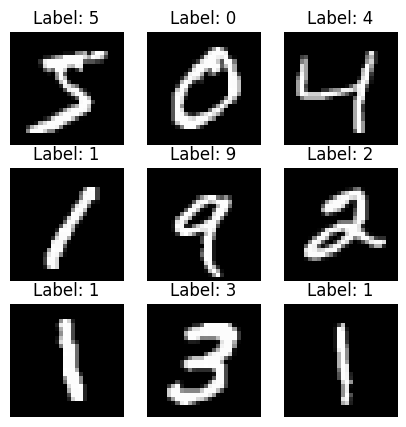

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()

###Tugas Kecil

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


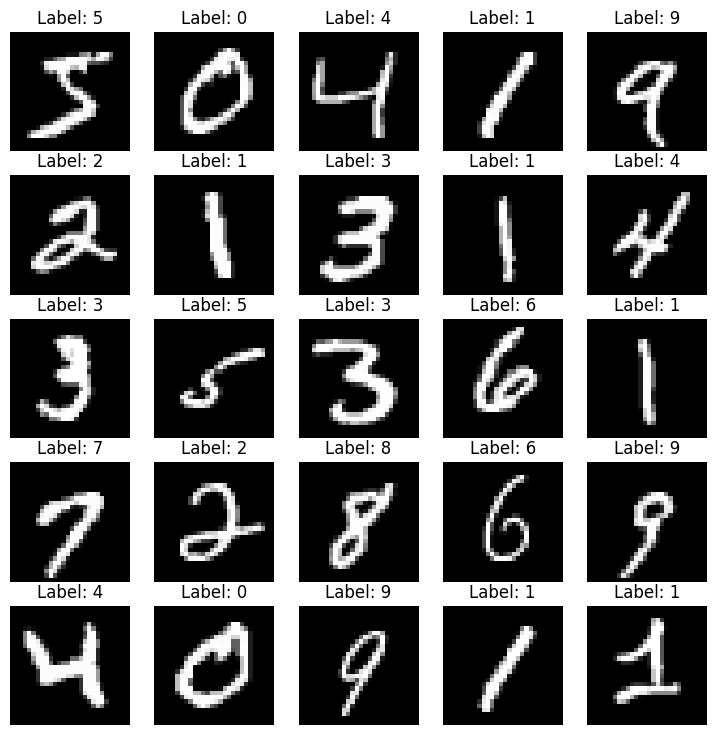

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(9, 9))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

###Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


###Tugas Kecil

In [2]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten (ubah 28x28 jadi 784 vektor & normalisasi 0–1)
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset agar lebih ringan

# Prediksi
y_pred = clf.predict(x_test_flat)

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


###Praktikum D3 – Membangun CNN Sederhana

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8944 - loss: 0.3662 - val_accuracy: 0.9787 - val_loss: 0.0720
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9814 - loss: 0.0626 - val_accuracy: 0.9852 - val_loss: 0.0535
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9874 - loss: 0.0408 - val_accuracy: 0.9877 - val_loss: 0.0455
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9907 - loss: 0.0278 - val_accuracy: 0.9883 - val_loss: 0.0486
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9870 - val_loss: 0.0455


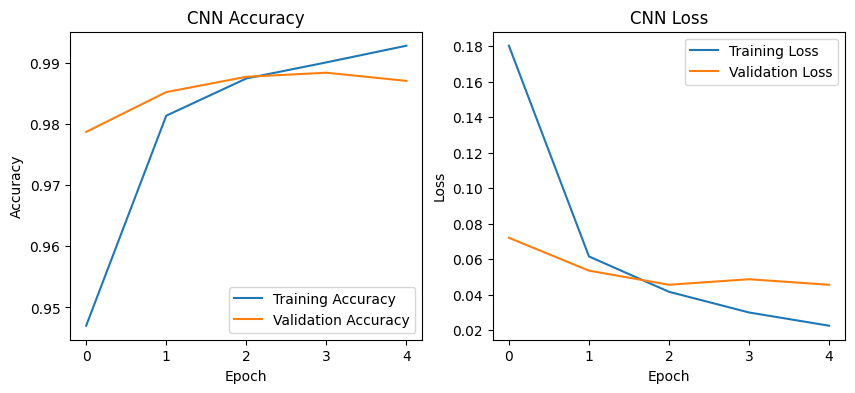

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Tugas Kecil

Epoch 1/20
1687/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9169 - loss: 0.2743

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.9170 - loss: 0.2741 - val_accuracy: 0.9822 - val_loss: 0.0552
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9870 - loss: 0.0403

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9870 - loss: 0.0403 - val_accuracy: 0.9887 - val_loss: 0.0398
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9923 - loss: 0.0243 - val_accuracy: 0.9868 - val_loss: 0.0486
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9882 - val_loss: 0.0440
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9892 - val_loss: 0.0435

Akurasi di data test: 0.9879, Loss: 0.0349


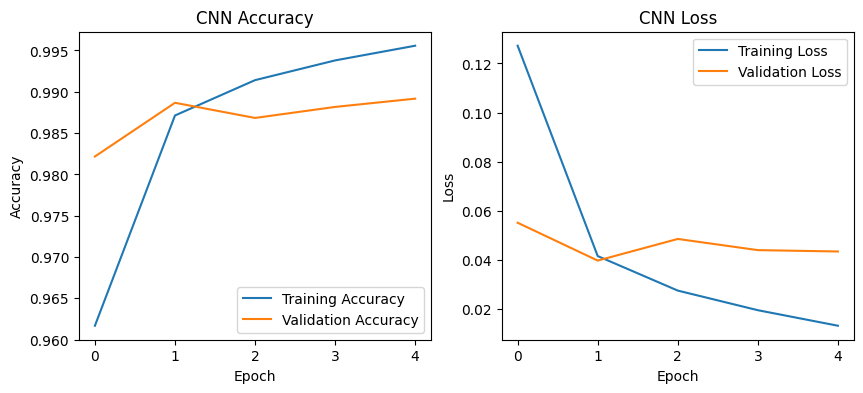

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# === Preprocessing data (anggap data sudah ada: x_train, y_train, x_test, y_test) ===
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

# === Definisi model CNN ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === Kompilasi model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cnn_model.h5", save_best_only=True)

# === Latih model ===
history = model.fit(
    x_train_cnn, y_train,
    epochs=20,                 # Bisa lebih banyak, nanti berhenti otomatis
    validation_split=0.1,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# === Evaluasi di data test ===
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"\nAkurasi di data test: {test_acc:.4f}, Loss: {test_loss:.4f}")

# === Plot hasil training ===
plt.figure(figsize=(10,4))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


###Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.3702 - loss: 1.7289 - val_accuracy: 0.5484 - val_loss: 1.2690
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.5925 - loss: 1.1587 - val_accuracy: 0.6448 - val_loss: 1.0254
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6515 - loss: 0.9957 - val_accuracy: 0.6610 - val_loss: 0.9694
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.6846 - loss: 0.9093 - val_accuracy: 0.6608 - val_loss: 0.9916
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.7117 - loss: 0.8386 - val_accuracy: 0.6950 - val_loss: 0.9047
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7285 - loss: 0.7749 - val_accuracy: 0.7018 - val_loss: 0.8832
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7485 - loss: 0.7255 - val_accuracy: 0.6930 - val_loss: 0.9046
Epoch 8/10
1407/1407 ━━

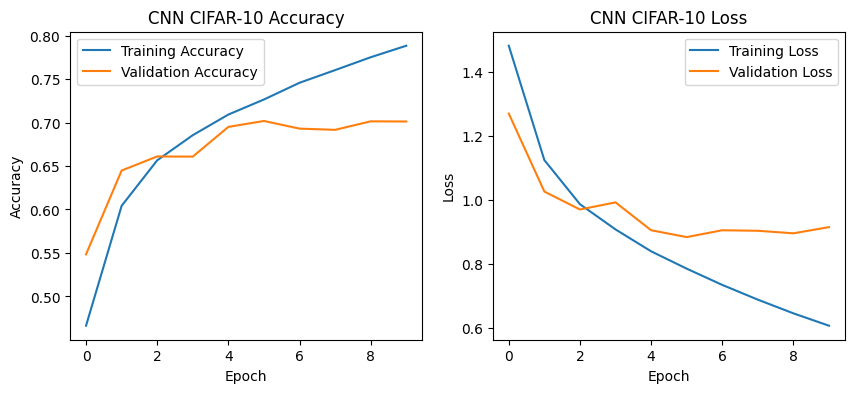

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Tugas Kecil

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.2757 - loss: 1.9353 - val_accuracy: 0.5180 - val_loss: 1.3597
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.4569 - loss: 1.4931 - val_accuracy: 0.5662 - val_loss: 1.2090
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.5004 - loss: 1.3717 - val_accuracy: 0.6078 - val_loss: 1.1339
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.5320 - loss: 1.2895 - val_accuracy: 0.6356 - val_loss: 1.0571
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.5560 - loss: 1.2260 - val_accuracy: 0.6492 - val_loss: 0.9994
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5870 - loss: 1.1610 - val_accuracy: 0.6580 - val_loss: 1.0099
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.5963 - loss: 1.1266 - val_accuracy: 0.6526 - val_loss: 0.9907
Epoch 8/10
1407/1407 ━━

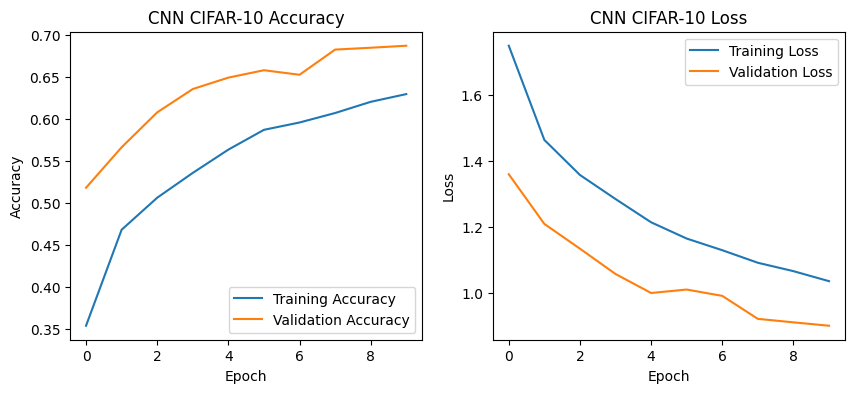

In [8]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# === Load dataset CIFAR-10 ===
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# === Definisi model CNN dengan Dropout ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Tambahan Dropout
    layers.Dense(10, activation='softmax')
])

# === Kompilasi model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Training model ===
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# === Plot hasil training ===
plt.figure(figsize=(10,4))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Praktikum D5 – Transfer Learning dengan Model Pra-Latih

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False
model = models.Sequential([
base_model,
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Tugas Kecil

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 602s 427ms/step - accuracy: 0.5082 - loss: 1.4002 - val_accuracy: 0.6122 - val_loss: 1.0949
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 652s 448ms/step - accuracy: 0.6260 - loss: 1.0648 - val_accuracy: 0.6242 - val_loss: 1.0383
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 652s 427ms/step - accuracy: 0.6587 - loss: 0.9707 - val_accuracy: 0.6504 - val_loss: 1.0029
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 629s 447ms/step - accuracy: 0.6823 - loss: 0.9115 - val_accuracy: 0.6598 - val_loss: 0.9704
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 627s 446ms/step - accuracy: 0.6967 - loss: 0.8571 - val_accuracy: 0.6658 - val_loss: 0.9576


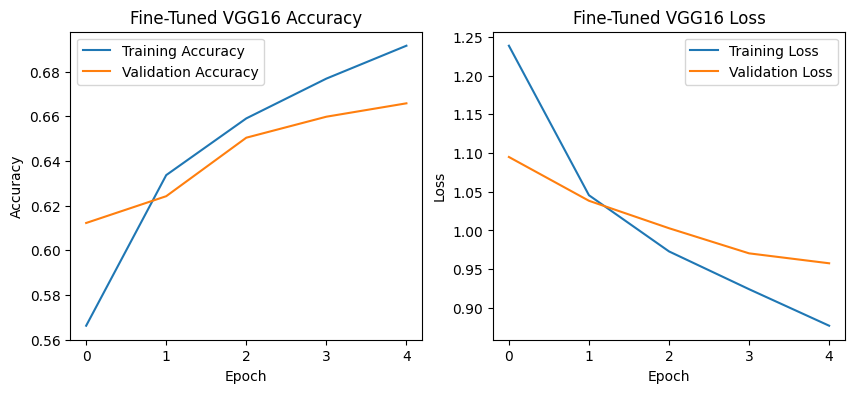

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# === Load base model VGG16 (pretrained) ===
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))

# Awalnya freeze semua layer
base_model.trainable = True
for layer in base_model.layers[:-2]:  # Bekukan semua kecuali 2 lapisan terakhir
    layer.trainable = False

# === Definisi model Transfer Learning dengan Fine-tuning ===
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === Kompilasi model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Training model ===
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# === Plot hasil training ===
plt.figure(figsize=(10,4))

# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fine-Tuned VGG16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Fine-Tuned VGG16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1000
           1       0.66      0.65      0.66      1000
           2       0.56      0.47      0.51      1000
           3       0.49      0.38      0.43      1000
           4       0.55      0.53      0.54      1000
           5       0.51      0.60      0.55      1000
           6       0.56      0.72      0.63      1000
           7       0.66      0.68      0.67      1000
           8       0.77      0.65      0.70      1000
           9       0.62      0.59      0.61      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



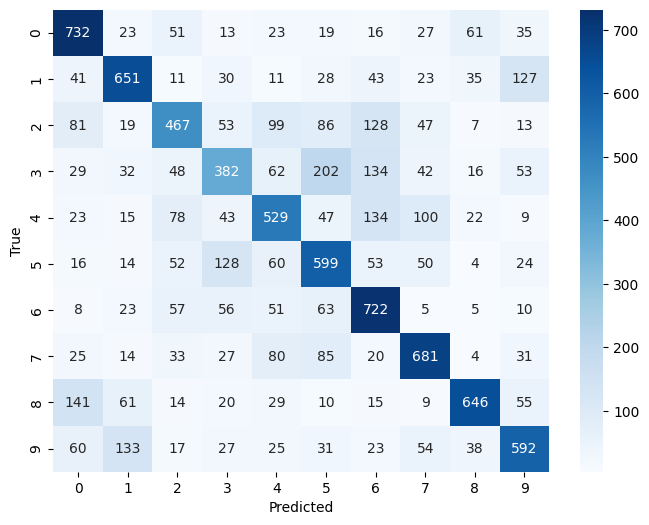

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()